In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
transcriptome = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/plate1_4_tpm_normalized.csv",
    index_col=0,
)
rows_to_drop_expression_data = [
    "A2450525897_n01_undetermined",
    "A2449446903_n01_undetermined",
    "B250508004_n01_undetermined",
    "B2449500127_n01_undetermined",
]
transcriptome = transcriptome.drop(index=rows_to_drop_expression_data)
transcriptome = transcriptome.sort_index()

metadata = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/Plates_1_to_4_metadata_merged_luke.csv",
    index_col=0,
)
metadata = metadata.drop(
    columns=[
        "arb.sort",
        "sample-id",
        "Ambiguous Unstranded",
        "Ambiguous Forward",
        "Multimapping",
        "Unmapped Over Mapped",
    ]
)
metadata["Date and Time"] = metadata["date"] + " " + metadata["time"]
luke_time_data_format = "%-m/%-d/%y %-H:%-M"
metadata["Date and Time"] = pd.to_datetime(
    metadata["Date and Time"], format=luke_time_data_format
)

unusable_samples = [
    "A2450525897_n01_LICRNA01_A06",
    "A2450525897_n01_LICRNA01_A08",
    "A2450525897_n01_LICRNA01_C11",
    "A2450525897_n01_LICRNA01_D11",
    "A2450525897_n01_LICRNA01_D12",
    "A2449446903_n01_LICRNA02_F01",
    "B2449500127_n01_LICRNA04_A04",
    "B2449500127_n01_LICRNA04_A06",
    "B2449500127_n01_LICRNA04_A07",
]
borderline_unusable = [
    "A2450525897_n01_LICRNA01_F03",
    "A2450525897_n01_LICRNA01_G07",
    "A2449446903_n01_LICRNA02_A04",
    "A2449446903_n01_LICRNA02_H10",
    "B2449500127_n01_LICRNA04_H02",
    "B2449500127_n01_LICRNA04_H11",
]
all_unsable = borderline_unusable + unusable_samples

trimmed_transcriptome = transcriptome.drop(index=all_unsable)
trimmed_metadata = metadata.drop(index=all_unsable)
trimmed_metadata = trimmed_metadata.sort_index()
trimmed_transcriptome = trimmed_transcriptome.dropna(how="all", axis=0)
trimmed_transcriptome = trimmed_transcriptome.dropna(how="all", axis=1)

In [3]:
long_term_transcriptome = trimmed_transcriptome.loc[
    trimmed_metadata["Experiment Type"] == "Long Term"
]
long_term_metadata = trimmed_metadata.loc[
    trimmed_metadata["Experiment Type"] == "Long Term"
]

In [4]:
long_term_transcriptome = long_term_transcriptome.sort_index()
long_term_metadata = long_term_metadata.sort_index()

long_term_transcriptome

,AT1G01010,AT1G01020,AT1G03987,AT1G01030,AT1G01040,AT1G03993,AT1G01046,AT1G01050,AT1G03997,AT1G01060,...,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp086,ArthCt118,ArthCp083,ArthCt111,ArthCp084,ArthCp085
A2449446903_n01_LICRNA02_A01,0.382839,11.929183,0.0,3.731527,3.602189,0.0,0.0,31.063543,0.0,3.966935,...,17.950907,44.209074,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,6.266498
A2449446903_n01_LICRNA02_A02,0.000000,5.826682,0.0,1.501594,3.439569,0.0,0.0,22.712417,0.0,18.186693,...,1.986484,9.688606,0.000000,5.501032,0.0,0.0,0.519342,0.0,0.000000,3.467317
A2449446903_n01_LICRNA02_A03,1.021565,7.683520,0.0,0.301733,2.700528,0.0,0.0,42.431625,0.0,12.937632,...,7.983340,16.384320,0.000000,7.983340,0.0,0.0,0.166972,0.0,0.000000,0.000000
A2449446903_n01_LICRNA02_A05,0.732717,3.149144,0.0,1.947758,3.742586,0.0,0.0,26.541337,0.0,23.861601,...,17.178143,17.005325,0.000000,0.000000,0.0,0.0,0.628742,0.0,0.000000,0.000000
A2449446903_n01_LICRNA02_A06,1.614233,1.238895,0.0,6.130092,4.215597,0.0,0.0,19.379509,0.0,5.006570,...,16.219201,43.599301,0.000000,0.000000,0.0,0.0,1.074213,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_G04,0.496406,8.356214,0.0,3.372257,3.069350,0.0,0.0,60.177712,0.0,23.758980,...,3.879318,10.115887,0.000000,10.145909,0.0,0.0,0.365112,0.0,0.000000,4.401263
B250508004_n01_LICRNA03_H01,1.365172,7.171230,0.0,1.926502,3.574878,0.0,0.0,53.113875,0.0,40.291678,...,1.185396,6.525640,16.595542,4.923952,0.0,0.0,0.384285,0.0,0.000000,4.448467
B250508004_n01_LICRNA03_H02,3.903593,1.198375,0.0,1.482399,3.897820,0.0,0.0,24.240094,0.0,8.805132,...,91.517576,14.520754,0.000000,2.011375,0.0,0.0,0.000000,0.0,46.732379,2.281997
B250508004_n01_LICRNA03_H03,0.365827,4.913399,0.0,0.972466,3.761743,0.0,0.0,14.311528,0.0,10.334051,...,4.288305,7.558461,0.000000,0.329870,0.0,0.0,0.022423,0.0,0.000000,4.865277


In [5]:
long_term_metadata = long_term_metadata.sort_values(by="sampID")
long_term_metadata

,plate.pos,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,No Feature,plate_row,plate_col,Total Reads,Experiment Type,Sample Month,daysincestart,Date and Time
filename,,,,,,,,,,,,,,,,,
A2450525897_n01_LICRNA01_A01,A01,LIC001,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2633048.0,112554.0,A,1,2248661.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_B01,B01,LIC002,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,5074184.0,226718.0,B,1,5984566.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_C01,C01,LIC003,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2283008.0,97848.0,C,1,2936453.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_D01,D01,LIC004,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,1263467.0,49095.0,D,1,1359823.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_E01,E01,LIC005,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,3004324.0,135512.0,E,1,2680737.0,Long Term,November,0,2023-11-01 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_D04,D04,LIC364,plant,t08,12/5/23,8:00,LIC_04,LICRNA_03,3938079.0,607579.0,D,4,7492987.0,Long Term,December,34,2023-12-05 08:00:00
B250508004_n01_LICRNA03_E04,E04,LIC365,plant,t08,12/5/23,8:00,LIC_04,LICRNA_03,2930881.0,411155.0,E,4,5576195.0,Long Term,December,34,2023-12-05 08:00:00
B250508004_n01_LICRNA03_F04,F04,LIC366,plant,t08,12/5/23,8:00,LIC_04,LICRNA_03,3451594.0,558062.0,F,4,7678391.0,Long Term,December,34,2023-12-05 08:00:00


In [6]:
transcriptome_w_sampid = long_term_transcriptome.merge(
    right=long_term_metadata[["sampID"]], left_index=True, right_index=True
)
transcriptome_w_sampid = transcriptome_w_sampid.set_index("sampID", drop=True)
transcriptome_w_sampid = transcriptome_w_sampid.sort_index()
transcriptome_w_sampid

,AT1G01010,AT1G01020,AT1G03987,AT1G01030,AT1G01040,AT1G03993,AT1G01046,AT1G01050,AT1G03997,AT1G01060,...,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp086,ArthCt118,ArthCp083,ArthCt111,ArthCp084,ArthCp085
sampID,,,,,,,,,,,,,,,,,,,,,
LIC001,4.944011,1.397952,0.0,5.994827,5.876072,0.0,0.0,58.062147,0.0,15.150509,...,0.000000,13.256631,0.000000,0.938539,0.0,0.0,0.956942,0.0,0.0,1.597223
LIC002,2.911492,4.379655,0.0,2.665837,3.261267,0.0,0.0,57.934612,0.0,10.439273,...,0.000000,13.734068,0.000000,0.350043,0.0,0.0,0.166556,0.0,0.0,2.184266
LIC003,6.270921,9.657724,0.0,0.000000,4.158376,0.0,0.0,38.161651,0.0,10.623477,...,34.304262,31.001035,0.000000,0.000000,0.0,0.0,0.051248,0.0,0.0,0.855379
LIC004,2.680258,0.000000,0.0,0.395825,3.962975,0.0,0.0,46.601987,0.0,18.074182,...,0.000000,12.137562,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
LIC005,3.690795,5.635420,0.0,3.786748,2.141076,0.0,0.0,37.996762,0.0,8.530523,...,0.000000,9.676399,0.000000,0.000000,0.0,0.0,0.142875,0.0,0.0,1.987260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LIC364,0.843489,3.342009,0.0,0.934258,3.004534,0.0,0.0,48.733381,0.0,8.870193,...,21.011072,6.923284,0.000000,3.042327,0.0,0.0,0.529922,0.0,0.0,2.696608
LIC365,0.000000,3.271514,0.0,1.416411,3.089950,0.0,0.0,37.940010,0.0,16.375642,...,0.000000,7.238800,3.569130,1.921839,0.0,0.0,0.167959,0.0,0.0,2.803390
LIC366,0.449073,1.340328,0.0,1.680103,1.395051,0.0,0.0,27.328328,0.0,6.844456,...,19.886741,5.310035,10.528274,3.599410,0.0,0.0,0.489332,0.0,0.0,0.612554


In [26]:
cleaned_transcriptome = transcriptome_w_sampid.loc[:, transcriptome_w_sampid.sum() > 1]
cleaned_transcriptome

,AT1G01010,AT1G01020,AT1G03987,AT1G01030,AT1G01040,AT1G01046,AT1G01050,AT1G01060,AT1G01070,AT1G04003,...,ArthCr090,ArthCr089,ArthCt114,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp083,ArthCp084,ArthCp085
sampID,,,,,,,,,,,,,,,,,,,,,
LIC001,4.944011,1.397952,0.0,5.994827,5.876072,0.0,58.062147,15.150509,2.158999,0.0,...,72.495324,103.009527,0.000000,0.000000,13.256631,0.000000,0.938539,0.956942,0.0,1.597223
LIC002,2.911492,4.379655,0.0,2.665837,3.261267,0.0,57.934612,10.439273,0.000000,0.0,...,11.133395,81.152094,20.196981,0.000000,13.734068,0.000000,0.350043,0.166556,0.0,2.184266
LIC003,6.270921,9.657724,0.0,0.000000,4.158376,0.0,38.161651,10.623477,1.156233,0.0,...,95.918714,107.359958,0.000000,34.304262,31.001035,0.000000,0.000000,0.051248,0.0,0.855379
LIC004,2.680258,0.000000,0.0,0.395825,3.962975,0.0,46.601987,18.074182,6.177330,0.0,...,102.491695,101.970639,51.646989,0.000000,12.137562,0.000000,0.000000,0.000000,0.0,0.000000
LIC005,3.690795,5.635420,0.0,3.786748,2.141076,0.0,37.996762,8.530523,0.537244,0.0,...,31.834755,63.245803,0.000000,0.000000,9.676399,0.000000,0.000000,0.142875,0.0,1.987260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LIC364,0.843489,3.342009,0.0,0.934258,3.004534,0.0,48.733381,8.870193,0.000000,0.0,...,55.293558,76.384066,29.256352,21.011072,6.923284,0.000000,3.042327,0.529922,0.0,2.696608
LIC365,0.000000,3.271514,0.0,1.416411,3.089950,0.0,37.940010,16.375642,1.333307,0.0,...,13.722094,67.902389,5.280357,0.000000,7.238800,3.569130,1.921839,0.167959,0.0,2.803390
LIC366,0.449073,1.340328,0.0,1.680103,1.395051,0.0,27.328328,6.844456,0.552001,0.0,...,15.536871,74.125047,11.537835,19.886741,5.310035,10.528274,3.599410,0.489332,0.0,0.612554


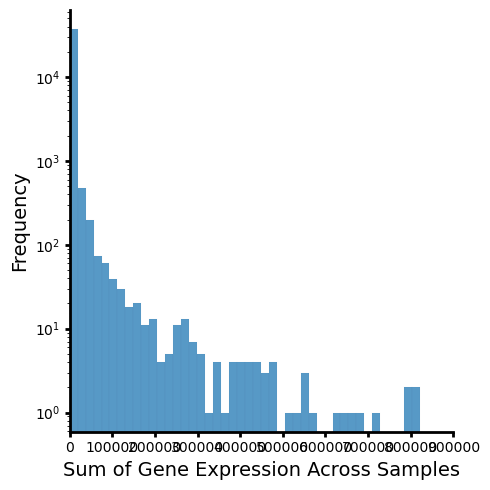

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor("white")
ax = sns.histplot(transcriptome_w_sampid.sum(), bins=2000)
plt.xlabel("Sum of Gene Expression Across Samples", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 100))
plt.xlim((0, 900000))
ax.set_yscale("log")
# handles, labels  =  ax.get_legend_handles_labels()
# ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(
    fontsize=10,
)  # rotation=90
plt.yticks(fontsize=10)
# plt.ylim(-.02,1)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line],
#      full_meta_data['plate.pos'][line], horizontalalignment='left',
#      size='medium', color='black', weight='semibold')

In [28]:
long_term_metadata

,plate.pos,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,No Feature,plate_row,plate_col,Total Reads,Experiment Type,Sample Month,daysincestart,Date and Time
filename,,,,,,,,,,,,,,,,,
A2450525897_n01_LICRNA01_A01,A01,LIC001,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2633048.0,112554.0,A,1,2248661.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_B01,B01,LIC002,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,5074184.0,226718.0,B,1,5984566.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_C01,C01,LIC003,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2283008.0,97848.0,C,1,2936453.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_D01,D01,LIC004,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,1263467.0,49095.0,D,1,1359823.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_E01,E01,LIC005,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,3004324.0,135512.0,E,1,2680737.0,Long Term,November,0,2023-11-01 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_D04,D04,LIC364,plant,t08,12/5/23,8:00,LIC_04,LICRNA_03,3938079.0,607579.0,D,4,7492987.0,Long Term,December,34,2023-12-05 08:00:00
B250508004_n01_LICRNA03_E04,E04,LIC365,plant,t08,12/5/23,8:00,LIC_04,LICRNA_03,2930881.0,411155.0,E,4,5576195.0,Long Term,December,34,2023-12-05 08:00:00
B250508004_n01_LICRNA03_F04,F04,LIC366,plant,t08,12/5/23,8:00,LIC_04,LICRNA_03,3451594.0,558062.0,F,4,7678391.0,Long Term,December,34,2023-12-05 08:00:00


In [29]:
microbiome_abundance = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/Microbiome/lic2024_16S_rab.csv"
)
long_term_microbiome = microbiome_abundance.merge(
    metadata[["sampID", "Experiment Type"]], left_on="plantID", right_on="sampID"
)
long_term_microbiome

,Sample,sample.type,timepoint,date,time,platename,daysincestart,plantID,Kingdom,Phylum,Class,Order,Family,Genus,Species,AbundR100,sampID,Experiment Type
0,LIC522,plant,c1_t11,2/11/24,12:00,LICCIRC_02,102,LIC522,d__Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales_A_650611,Pseudomonadaceae,Pseudomonas_E_647464,Pseudomonas_E_647464 viridiflava,79.1,LIC522,Circadian Experiment 1
1,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,66.1,LIC063,Long Term
2,LIC159,plant,t14,1/23/24,8:00,LIC_02,83,LIC159,d__Bacteria,Cyanobacteriota,Cyanobacteriia,Cyanobacteriales,Coleofasciculaceae,Caldora,Caldora sp010672925,60.5,LIC159,Long Term
3,LIC452,plant,c1_t06,2/10/24,16:00,LICCIRC_01,101,LIC452,d__Bacteria,Pseudomonadota,Gammaproteobacteria,Burkholderiales,Burkholderiaceae_A_595421,Massilia_574544,Massilia atriviolacea,59.8,LIC452,Circadian Experiment 1
4,LIC306,plant,t26,3/8/24,8:00,LIC_04,128,LIC306,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,57.2,LIC306,Long Term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12281,LIC122,plant,t11,12/15/23,8:00,LIC_02,44,LIC122,d__Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales,Nocardioidaceae,Nocardioides_A_392796,Nocardioides_A_392796 hankookensis,0.5,LIC122,Long Term
12282,LIC028,plant,t03,11/14/23,8:00,LIC_01,13,LIC028,d__Bacteria,Actinomycetota,Actinomycetes,Mycobacteriales,Geodermatophilaceae,Modestobacter,Modestobacter muralis,0.5,LIC028,Long Term
12283,LIC631,plant,c2_t05,3/2/24,12:00,LICCIRC_03,122,LIC631,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Caulobacterales,Caulobacteraceae,Brevundimonas,Brevundimonas subvibrioides,0.5,LIC631,Circadian Experiment 2
12284,LIC629,plant,c2_t05,3/2/24,12:00,LICCIRC_03,122,LIC629,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Rhizobiales_505101,Rhizobiaceae,Agrobacterium,Agrobacterium larrymoorei,0.5,LIC629,Circadian Experiment 2


In [30]:
genus_sum = (
    long_term_microbiome[["Sample", "Genus", "AbundR100"]]
    .groupby(["Sample", "Genus"])
    .sum()
)
genus_sum = genus_sum.reset_index()
genus_sum_w_tp = genus_sum.merge(
    metadata[["sampID", "timepoint"]], left_on="Sample", right_on="sampID"
)
all_present_genus = genus_sum_w_tp["Genus"].unique()

## Need to fill in missing genus in every sample first
for sampID in genus_sum_w_tp["sampID"].unique():
    sampid_only_df = genus_sum_w_tp.loc[genus_sum_w_tp["sampID"] == sampID]
    present_genus_in_samp = sampid_only_df["Genus"].unique()
    difference_in_present_bacteria = list(
        set(all_present_genus) - set(present_genus_in_samp)
    )
    current_time_point = sampid_only_df["timepoint"].iloc[0]
    empty_df_to_add = pd.DataFrame(
        columns=["Sample", "Genus", "AbundR100", "sampID", "timepoint"]
    )
    empty_df_to_add["Genus"] = difference_in_present_bacteria
    empty_df_to_add["Sample"] = sampID
    empty_df_to_add["AbundR100"] = 0
    empty_df_to_add["sampID"] = sampID
    empty_df_to_add["timepoint"] = current_time_point
    genus_sum_w_tp = pd.concat([genus_sum_w_tp, empty_df_to_add])

In [31]:
genus_sum_w_tp

,Sample,Genus,AbundR100,sampID,timepoint
0,LIC001,Actinomycetospora,0.6,LIC001,t01
1,LIC001,Actinoplanes,1.1,LIC001,t01
2,LIC001,Aeromicrobium,0.8,LIC001,t01
3,LIC001,Blastococcus,1.7,LIC001,t01
4,LIC001,Caulobacter_487784,0.5,LIC001,t01
...,...,...,...,...,...
123,LIC644,UBA5216,0.0,LIC644,c2_t06
124,LIC644,Janthinobacterium_571130,0.0,LIC644,c2_t06
125,LIC644,Modestobacter,0.0,LIC644,c2_t06
126,LIC644,Homoserinimonas_381256,0.0,LIC644,c2_t06


In [54]:
timepoint_abundance_matrix = pd.pivot_table(
    genus_sum_w_tp,
    values="AbundR100",
    index="sampID",
    columns="Genus",
)
timepoint_abundance_matrix

longterm_sample_abundance_matrix = timepoint_abundance_matrix.loc[
    long_term_metadata["sampID"]
]

longterm_sample_abundance_matrix

Genus,AVCC01,Abditibacterium,Actinoallomurus,Actinocorallia,Actinomycetospora,Actinoplanes,Aeromicrobium,Aetherobacter,Agreia,Agrobacterium,...,Telluria_573210,Terracoccus,UBA1952,UBA4416,UBA5216,Umezawaea,Variovorax,Virgisporangium,Williamsia_A,Xenophilus_587940
sampID,,,,,,,,,,,,,,,,,,,,,
LIC001,0.0,0.0,0.0,0.0,0.6,1.1,0.8,0.0,0.0,0.0,...,0.9,0.0,0.0,0.0,0.0,0.0,0.7,0.0,0.0,0.0
LIC002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.9,0.0,0.0,0.0,0.0,0.0,2.6,0.0,0.0,0.0
LIC003,0.0,0.0,0.0,0.0,0.0,0.0,4.9,0.0,0.0,0.0,...,7.3,0.0,0.0,0.0,0.0,0.0,0.7,0.0,0.0,0.0
LIC004,0.0,0.0,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.7,0.0,0.0,0.0
LIC005,0.0,0.0,0.0,0.0,0.6,0.0,0.6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LIC364,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.6,0.0,0.0,0.0
LIC365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,2.1,0.0,0.0,0.0
LIC366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
longterm_sample_abundance_matrix = longterm_sample_abundance_matrix.loc[
    :, (longterm_sample_abundance_matrix > 0).sum() > 8
]

In [56]:
print(longterm_sample_abundance_matrix["AVCC01"].to_string())

KeyError: 'AVCC01'

In [57]:
# Align rows and keep only shared samples
bact, expr = longterm_sample_abundance_matrix.align(
    cleaned_transcriptome, join="inner", axis=0
)

# Spearman: rank-transform then Pearson on ranks
bact_r = bact.rank(axis=0, method="average")
expr_r = expr.rank(axis=0, method="average")

# Standardize (z-score) ranks
bact_z = (bact_r - bact_r.mean()) / bact_r.std(ddof=0)
expr_z = (expr_r - expr_r.mean()) / expr_r.std(ddof=0)

# Cross-correlation matrix: bacteria x transcripts (Spearman)
cross_corr = (bact_z.T @ expr_z) / (len(bact_z) - 1)

In [58]:
cross_corr

,AT1G01010,AT1G01020,AT1G03987,AT1G01030,AT1G01040,AT1G01046,AT1G01050,AT1G01060,AT1G01070,AT1G04003,...,ArthCr090,ArthCr089,ArthCt114,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp083,ArthCp084,ArthCp085
Genus,,,,,,,,,,,,,,,,,,,,,
Actinomycetospora,-0.106540,0.205626,-0.050453,0.116054,-0.010920,0.066640,0.036854,-0.004855,-0.067991,-0.050453,...,0.107573,0.094020,-0.005975,-0.095321,0.020009,0.043137,-0.033690,-0.019736,-0.064542,-0.103606
Actinoplanes,0.007221,0.085053,0.052957,-0.011290,0.051883,-0.050828,-0.028903,-0.017588,0.037182,-0.055450,...,0.044251,0.103452,0.001625,-0.001269,0.088014,-0.046231,0.017284,0.061541,-0.076106,0.038580
Aeromicrobium,-0.080059,0.127455,-0.028746,-0.046181,0.142460,0.020303,-0.110077,0.061938,-0.059345,0.143729,...,-0.013636,0.057061,-0.134587,-0.171612,0.060438,-0.019200,-0.043720,-0.046399,-0.087877,-0.028808
Aetherobacter,0.065376,-0.017412,0.111206,-0.175290,0.083484,-0.021336,-0.060893,0.035376,0.045367,-0.037570,...,0.143894,0.202892,0.123631,0.131327,0.210269,0.119802,0.037922,0.209387,0.005033,0.064438
Agrobacterium,0.023459,0.030883,-0.040370,-0.053603,0.052252,0.012978,-0.001557,0.111270,0.070283,-0.040370,...,-0.033075,-0.030573,0.087678,0.044064,0.017044,0.113643,0.019009,0.159749,0.033183,-0.002860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rugamonas_570800,-0.084610,-0.117668,-0.045872,-0.084434,-0.065903,-0.022141,-0.085385,-0.123030,-0.050767,0.087697,...,-0.053693,-0.128734,0.026873,0.124009,-0.073227,-0.017833,0.036994,-0.023627,0.027730,0.094935
Solirubrobacter,-0.058258,0.084564,-0.027696,0.076202,0.028123,0.019721,0.066582,0.074774,-0.094708,-0.027696,...,-0.019349,0.035666,-0.055854,-0.063437,0.062779,-0.020881,0.015404,-0.151523,-0.084669,-0.017215
Sphingomonas_L_486704,-0.052908,-0.002908,-0.050704,0.163560,0.110033,-0.041213,0.056456,0.278804,-0.040476,-0.033989,...,0.028035,0.124801,-0.057802,-0.004491,0.065726,0.012775,0.052910,0.100601,-0.029963,-0.000511


In [59]:
# Top 100 values per row, keep shape (others set to NaN)
top_n_df = pd.DataFrame(
    cross_corr.apply(lambda x: x.nlargest(100).index.tolist(), axis=1).tolist(),
    columns=[f"Top_{i+1}" for i in range(100)],
    index=cross_corr.index,
)

top_n_df

,Top_1,Top_2,Top_3,Top_4,Top_5,Top_6,Top_7,Top_8,Top_9,Top_10,...,Top_91,Top_92,Top_93,Top_94,Top_95,Top_96,Top_97,Top_98,Top_99,Top_100
Genus,,,,,,,,,,,,,,,,,,,,,
Actinomycetospora,AT5G07130,ArthCt091,AT4G16480,ArthCp006,AT4G34135,AT1G56090,AT3G08000,AT1G50050,AT5G57130,AT4G16790,...,AT1G79980,AT1G15110,AT2G09862,AT5G61880,AT5G53430,AT5G62670,AT2G32620,AT3G11000,AT4G10140,AT1G15757
Actinoplanes,AT2G47240,AT1G60360,AT4G03600,AT3G62860,AT1G24260,AT5G09220,AT5G25160,AT2G22640,AT1G79840,AT3G02310,...,AT4G19830,AT5G37980,AT1G63320,AT4G33470,AT1G74810,AT1G03010,AT2G19470,AT2G35340,AT5G16570,AT4G31650
Aeromicrobium,AT1G50050,AT3G12270,AT3G21310,AT3G05920,AT5G39630,AT1G49010,AT1G06720,AT4G06614,AT5G40490,AT1G18120,...,AT5G61770,AT4G35910,AT5G03380,AT3G61180,AT5G40480,AT3G56120,AT3G11591,AT4G16370,AT1G09025,AT1G62350
Aetherobacter,ArthCp030,AT5G24150,AT4G20370,ArthCp002,AT1G28010,AT2G01029,ArthCp008,AT3G02310,ArthCp053,ArthCp065,...,AT1G69120,AT2G07806,AT2G07681,AT5G21950,AT5G36920,AT4G37630,AT2G32660,AT2G07716,AT3G16770,ArthCp049
Agrobacterium,AT2G40100,AT5G15480,AT4G31690,AT5G47590,AT2G09220,AT4G25430,AT3G49845,AT2G20700,AT1G07943,AT5G07105,...,AT1G61280,AT1G04233,AT1G18000,AT2G00580,AT4G08715,AT5G26220,AT5G66640,AT1G79460,AT2G41090,ArthCp020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rugamonas_570800,AT1G06283,AT4G36850,AT5G65010,AT2G26010,AT5G14770,AT2G40490,AT5G40590,AT2G09640,AT1G25550,AT3G07430,...,AT5G47700,AT4G02555,AT5G53460,AT4G04940,AT4G04565,AT3G54830,AT5G16130,AT2G44560,AT2G42220,AT1G56045
Solirubrobacter,AT3G09145,AT3G44710,AT2G41970,AT3G18890,AT5G42230,AT2G35390,AT2G08665,AT1G80470,AT5G03400,AT3G09280,...,AT1G02800,AT4G37930,AT3G15870,AT5G00345,AT1G50170,AT1G22520,AT5G60870,AT1G55920,AT5G66100,AT4G25410
Sphingomonas_L_486704,AT5G16210,AT1G76130,ArthCp074,AT2G39950,AT2G45960,AT4G15440,AT4G18960,AT1G33110,AT1G23030,AT3G44310,...,AT1G21110,AT3G54500,AT3G53650,AT1G62180,AT1G22910,AT1G11440,AT5G47600,AT1G77930,AT3G17675,DA397_mgr03


/Users/michael/miniconda3/envs/Luke_terrace/lib/python3.13/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/Users/michael/miniconda3/envs/Luke_terrace/lib/python3.13/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

<Figure size 1000x600 with 0 Axes>

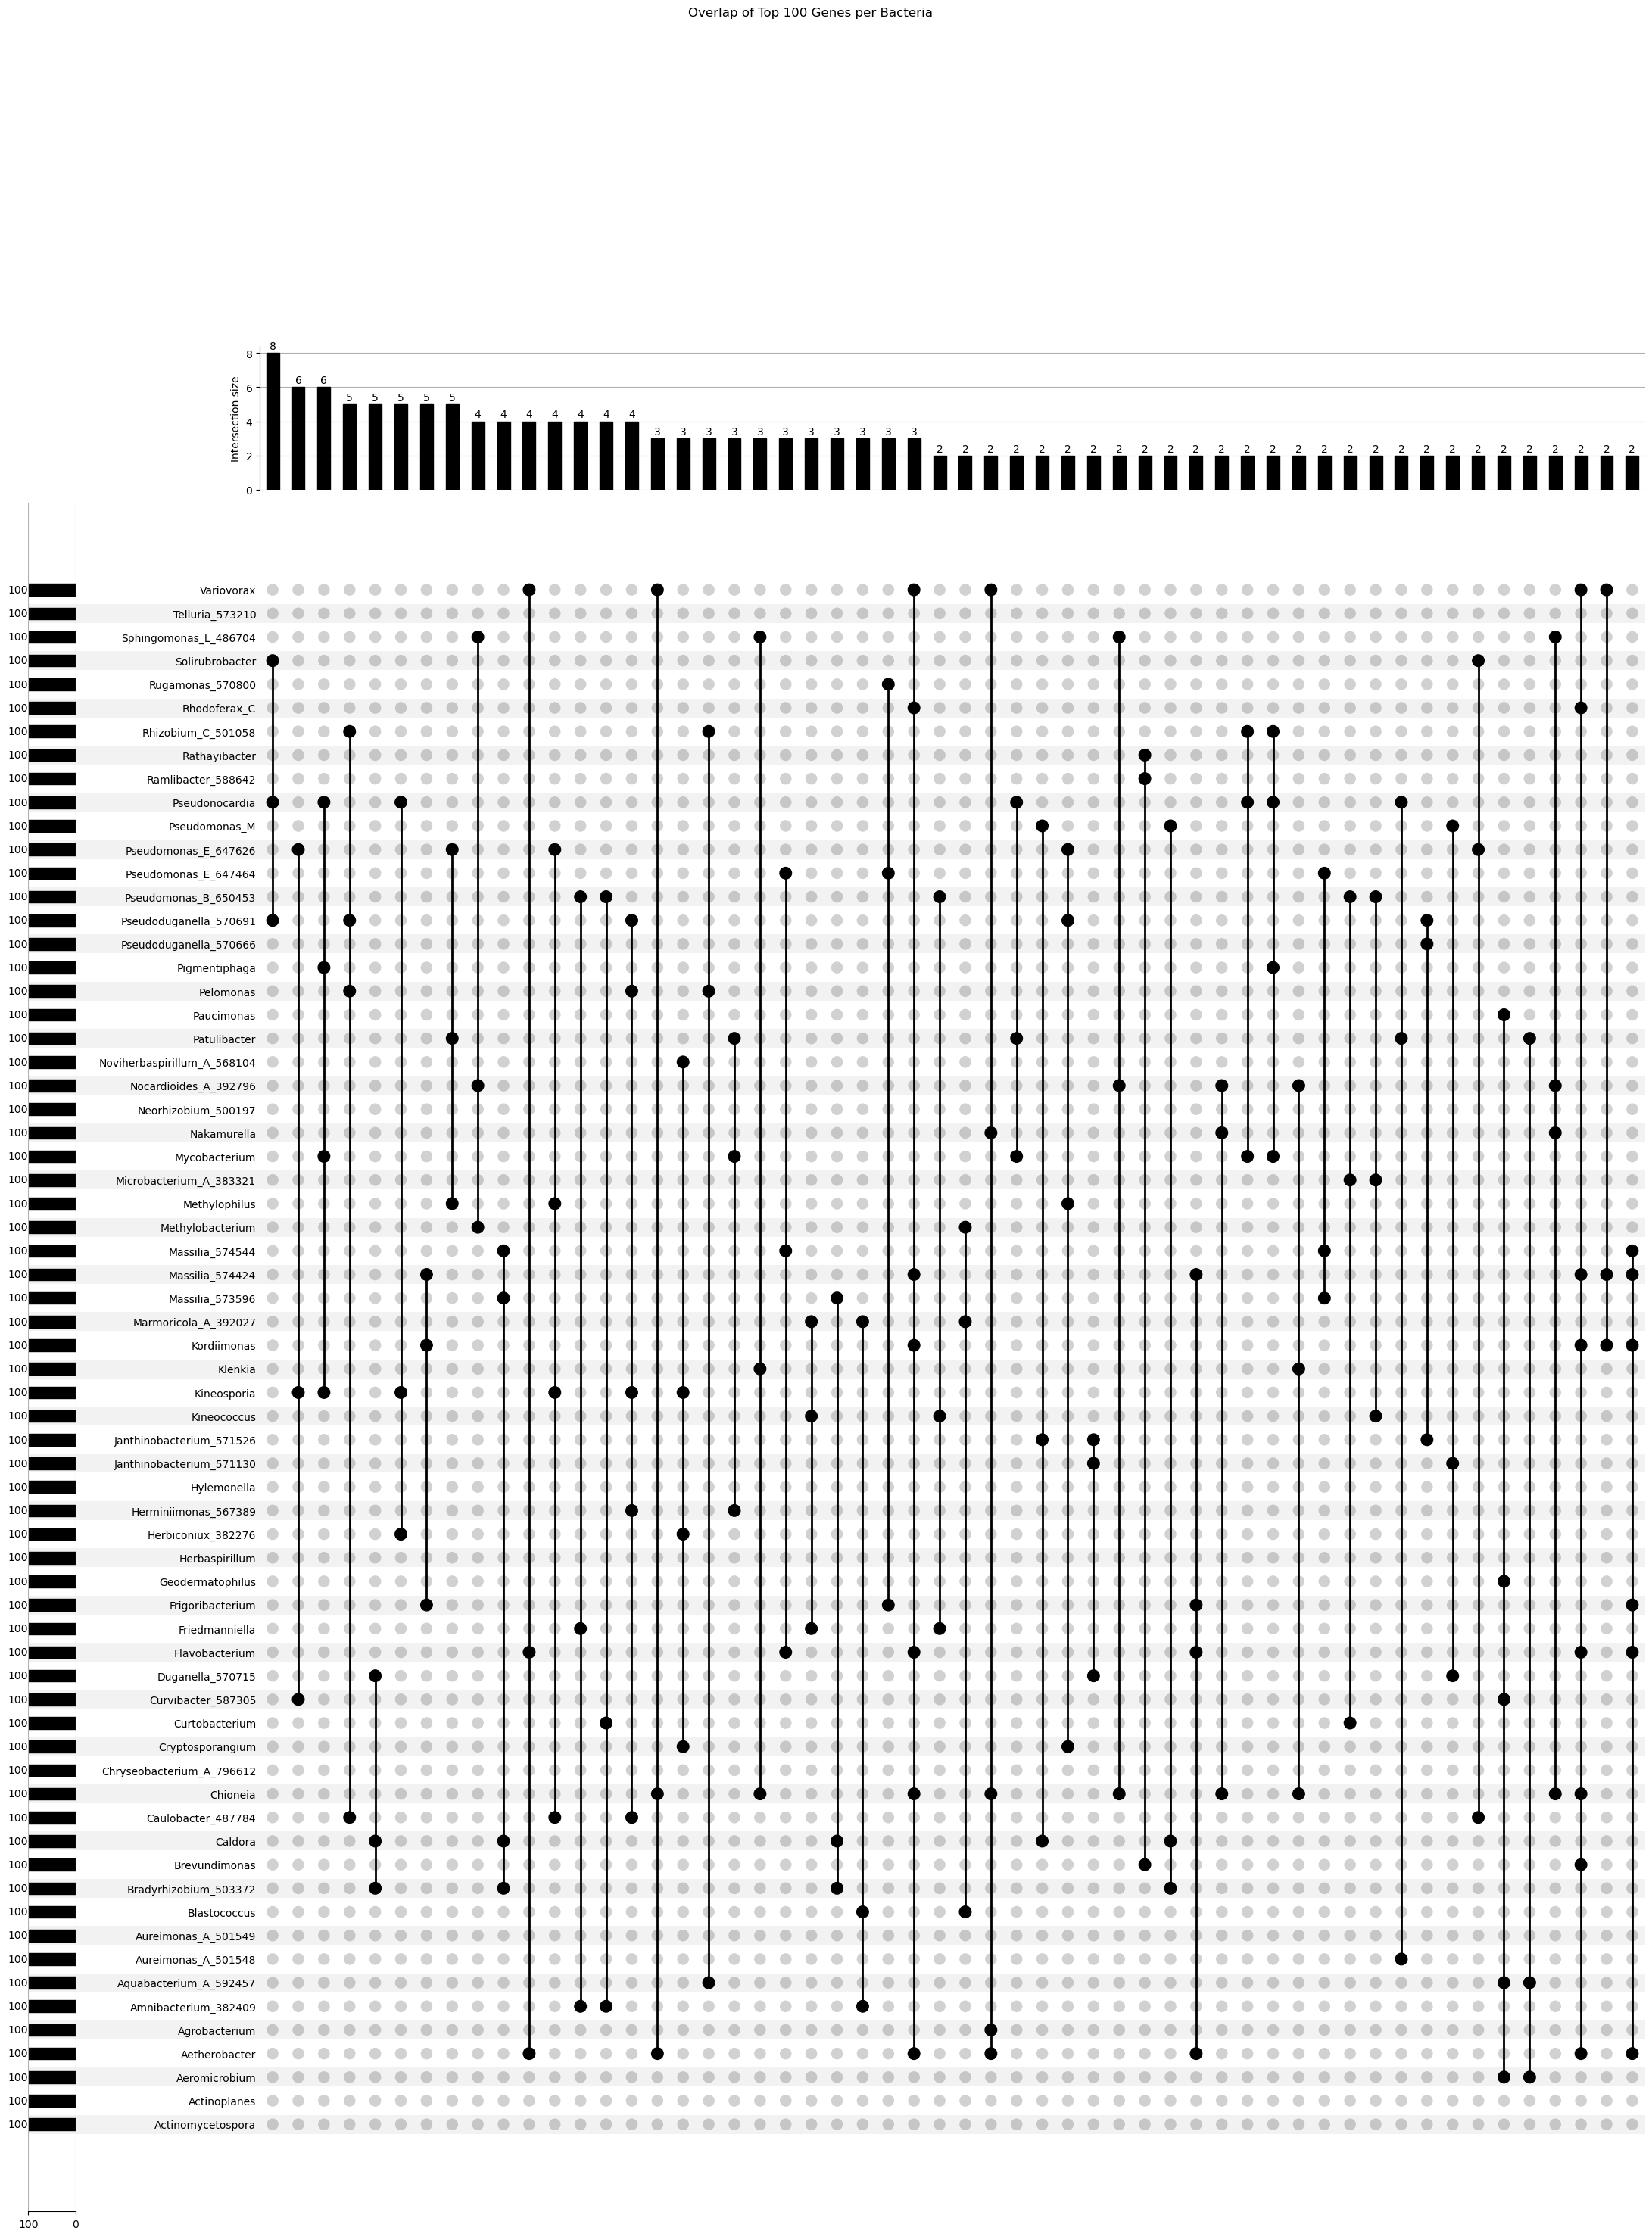

In [63]:
from upsetplot import UpSet, from_indicators

# Build a gene-by-bacteria membership matrix from top_n_df
top_gene_sets = {
    bact: set(top_n_df.loc[bact].dropna().tolist()) for bact in top_n_df.index
}

all_top_genes = sorted(set().union(*top_gene_sets.values()))
membership = pd.DataFrame(
    {
        bact: [gene in genes for gene in all_top_genes]
        for bact, genes in top_gene_sets.items()
    },
    index=all_top_genes,
)

upset_data = from_indicators(membership.columns, membership.reset_index(drop=True))

plt.figure(figsize=(10, 6))
UpSet(
    upset_data, show_counts=True, sort_by="cardinality", min_subset_size=2, min_degree=3
).plot()
plt.suptitle("Overlap of Top 100 Genes per Bacteria", y=1.02)
plt.tight_layout()